In [49]:
## Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

Data Loading

In [50]:
# Load the data
url = 'https://raw.githubusercontent.com/mpedimal2816/Ml-Project-1/refs/heads/main/energy_finance_dataset.csv'
df = pd.read_csv(url)

df.head()

,Date,Company ID,Revenue ($),Expense ($),Profit ($),Market Price ($),Volatility Index,Compliance Issue,Compliance Fine ($),Regulatory Change
0,2023-01-01,COMP_1,193524.66,380532.15,-187007.49,95.88,0.58,0,0.0,0
1,2023-01-02,COMP_1,38460.97,347139.58,-308678.61,84.10,0.67,0,0.0,0
2,2023-01-03,COMP_1,417896.89,88873.95,329022.94,46.36,0.25,0,0.0,0
3,2023-01-04,COMP_1,221653.06,120035.51,101617.55,85.07,0.21,0,0.0,0
4,2023-01-05,COMP_1,233474.29,315144.50,-81670.21,47.97,0.51,0,0.0,0


In [51]:
#Check for null values
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
Date                   0
Company ID             0
Revenue ($)            0
Expense ($)            0
Profit ($)             0
Market Price ($)       0
Volatility Index       0
Compliance Issue       0
Compliance Fine ($)    0
Regulatory Change      0
dtype: int64


In [52]:
#Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [53]:
#Display basic statistics
print("\nStatistical summary of numerical columns:")
df.describe()


Statistical summary of numerical columns:


,Revenue ($),Expense ($),Profit ($),Market Price ($),Volatility Index,Compliance Issue,Compliance Fine ($),Regulatory Change
count,36500.000000,36500.000000,36500.000000,36500.000000,36500.000000,36500.000000,36500.000000,36500.000000
mean,254950.057574,202193.398470,52756.659104,75.301256,0.499155,0.100192,55.590996,0.020000
std,141793.666214,113991.313951,182272.996299,25.920704,0.230433,0.300260,610.575645,0.140002
min,10012.860000,5002.190000,-385961.030000,30.010000,0.100000,0.000000,0.000000,0.000000
25%,131261.547500,103791.365000,-80045.312500,52.860000,0.300000,0.000000,0.000000,0.000000
50%,254261.525000,201544.020000,52697.060000,75.340000,0.500000,0.000000,0.000000,0.000000
75%,379084.055000,300806.107500,184406.780000,97.610000,0.700000,0.000000,0.000000,0.000000
max,499989.840000,399996.860000,491297.700000,120.000000,0.900000,1.000000,9997.980000,1.000000


In [54]:
# Additional info on data types and non-null counts
print("\nAdditional data info:")
print(df.info())


Additional data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36500 entries, 0 to 36499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 36500 non-null  object 
 1   Company ID           36500 non-null  object 
 2   Revenue ($)          36500 non-null  float64
 3   Expense ($)          36500 non-null  float64
 4   Profit ($)           36500 non-null  float64
 5   Market Price ($)     36500 non-null  float64
 6   Volatility Index     36500 non-null  float64
 7   Compliance Issue     36500 non-null  int64  
 8   Compliance Fine ($)  36500 non-null  float64
 9   Regulatory Change    36500 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 2.8+ MB
None


Checking dataset whether it is balanced or imbalanced

C:\Users\manas\AppData\Local\Temp\ipykernel_33512\2480653957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Regulatory Change', palette='viridis')


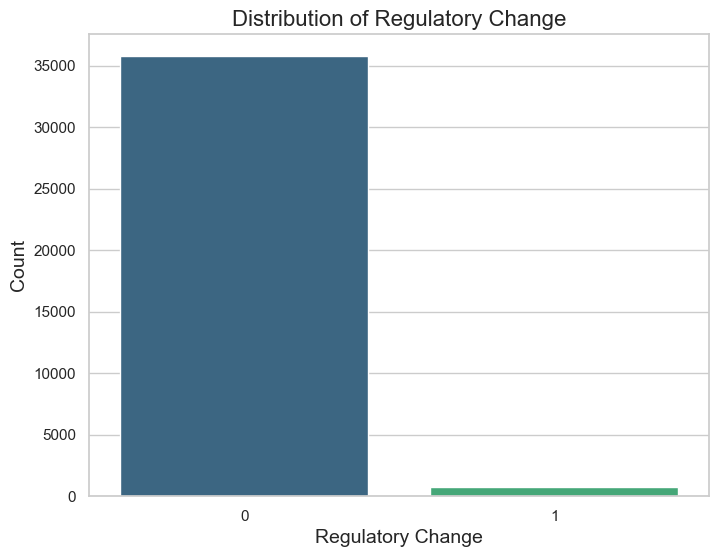

In [55]:
# Set plot style
sns.set(style="whitegrid")

# Plot the distribution of Regulatory Change
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Regulatory Change', palette='viridis')

# Add titles and labels
plt.title('Distribution of Regulatory Change', fontsize=16)
plt.xlabel('Regulatory Change', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show plot
plt.show()

Balancing the dataset using Oversampling

In [56]:
# Separate features and target
X = df.drop(columns=['Regulatory Change'])
y = df['Regulatory Change']

#Oversampling the minority class
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_balanced, y_balanced = oversampler.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
df_balanced = pd.concat([X_balanced, y_balanced], axis=1)

# Check for the distribution of the target variable after balancing
print("Distribution after balancing:")
print(df_balanced['Regulatory Change'].value_counts())

Distribution after balancing:
Regulatory Change
0    35770
1    35770
Name: count, dtype: int64


Visualizing the Balanced dataset

C:\Users\manas\AppData\Local\Temp\ipykernel_33512\1531710380.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced, x='Regulatory Change', palette='viridis')


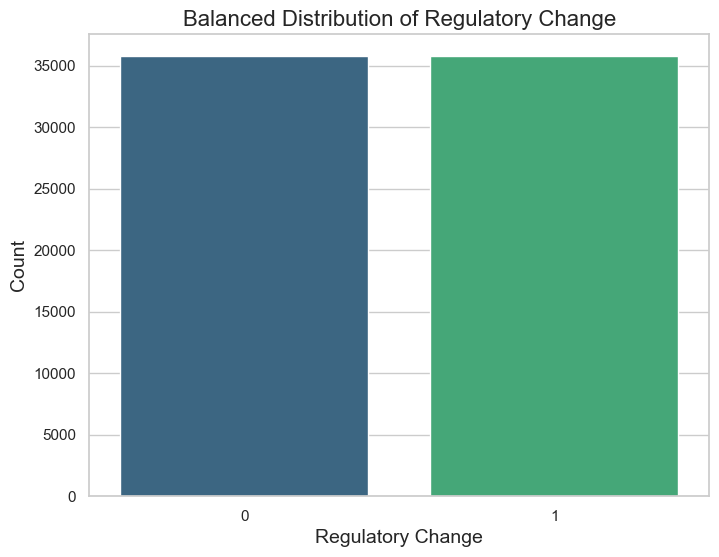

In [57]:
# Visualize the balanced distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_balanced, x='Regulatory Change', palette='viridis')

# Add titles and labels
plt.title('Balanced Distribution of Regulatory Change', fontsize=16)
plt.xlabel('Regulatory Change', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show plot
plt.show()

Feature Engineering

In [58]:
# Generate Profit Margin and Expense-to-Revenue Ratio
df_balanced['Profit Margin'] = df_balanced['Profit ($)'] / df_balanced['Revenue ($)']
df_balanced['Expense-to-Revenue Ratio'] = df_balanced['Expense ($)'] / df_balanced['Revenue ($)']

# Scaling the numerical features
columns_to_scale = ['Revenue ($)', 'Expense ($)', 'Profit ($)', 'Market Price ($)', 'Volatility Index', 
                    'Compliance Fine ($)', 'Profit Margin', 'Expense-to-Revenue Ratio']

scaler = StandardScaler()
df_balanced[columns_to_scale] = scaler.fit_transform(df_balanced[columns_to_scale])

# Display the first few rows to confirm changes
df_balanced.head()

,Date,Company ID,Revenue ($),Expense ($),Profit ($),Market Price ($),Volatility Index,Compliance Issue,Compliance Fine ($),Regulatory Change,Profit Margin,Expense-to-Revenue Ratio
0,2023-01-01,COMP_1,-0.418228,1.548600,-1.306903,0.796395,0.308534,0,-0.095412,0,-0.096948,0.096948
1,2023-01-02,COMP_1,-1.511715,1.259243,-1.974965,0.339881,0.699815,0,-0.095412,0,-2.431876,2.431876
2,2023-01-03,COMP_1,1.164013,-0.978704,1.526474,-1.122667,-1.126161,0,-0.095412,0,0.483078,-0.483078
3,2023-01-04,COMP_1,-0.219871,-0.708680,0.277855,0.377472,-1.300064,0,-0.095412,0,0.374301,-0.374301
4,2023-01-05,COMP_1,-0.136509,0.981997,-0.728526,-1.060274,0.004205,0,-0.095412,0,0.106968,-0.106968


Removing unnecessary columns

In [59]:
# Remove unnecessary columns
columns_to_drop = ['Date', 'Company ID']
df_balanced = df_balanced.drop(columns=columns_to_drop)

# Display the remaining columns to confirm
print("Remaining columns for model building:")
print(df_balanced.columns)

Remaining columns for model building:
Index(['Revenue ($)', 'Expense ($)', 'Profit ($)', 'Market Price ($)',
       'Volatility Index', 'Compliance Issue', 'Compliance Fine ($)',
       'Regulatory Change', 'Profit Margin', 'Expense-to-Revenue Ratio'],
      dtype='object')


Model Evaluation: Logistic Regression

Logistic Regression Performance:
Accuracy: 0.5136
Precision: 0.5126
Recall: 0.5123
F1 Score: 0.5125


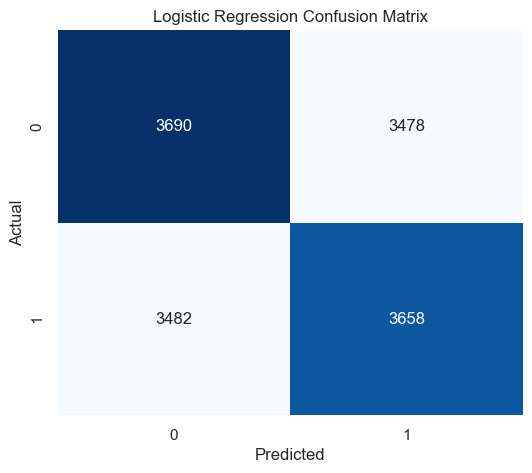


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      7168
           1       0.51      0.51      0.51      7140

    accuracy                           0.51     14308
   macro avg       0.51      0.51      0.51     14308
weighted avg       0.51      0.51      0.51     14308



In [60]:
# df_balanced is already defined
X = df_balanced.drop(columns=['Regulatory Change'])
y = df_balanced['Regulatory Change']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Calculate metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

# Print metrics
print("Logistic Regression Performance:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")

# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Model Evaluation: Random Forest

Random Forest Performance:
Accuracy: 0.9998
Precision: 0.9996
Recall: 1.0000
F1 Score: 0.9998


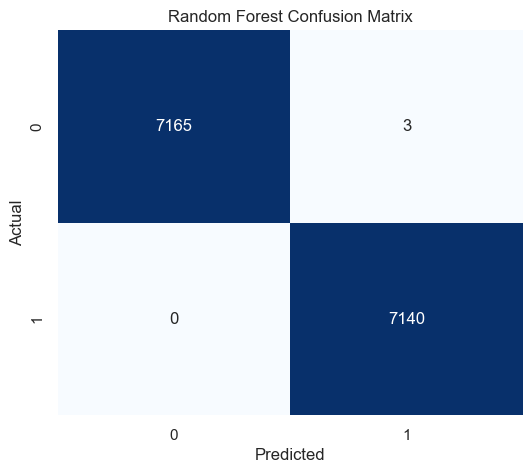


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7168
           1       1.00      1.00      1.00      7140

    accuracy                           1.00     14308
   macro avg       1.00      1.00      1.00     14308
weighted avg       1.00      1.00      1.00     14308



In [61]:
# 'Regulatory Change' is the target variable
X = df_balanced.drop(columns=['Regulatory Change'])
y = df_balanced['Regulatory Change']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# Print metrics
print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")

# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Classification report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Model Evaluation: Naive Bayes Model

Naive Bayes Performance:
Accuracy: 0.5128
Precision: 0.5369
Recall: 0.1720
F1 Score: 0.2605


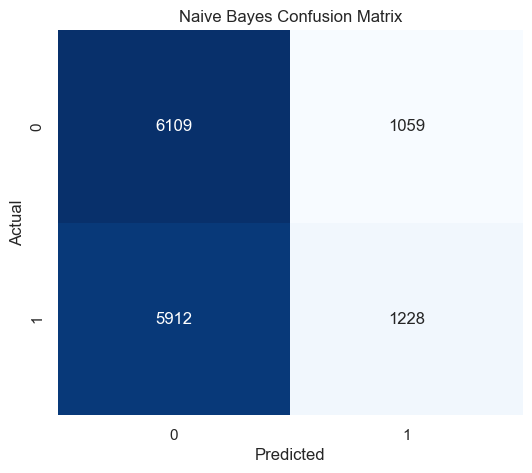


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.51      0.85      0.64      7168
           1       0.54      0.17      0.26      7140

    accuracy                           0.51     14308
   macro avg       0.52      0.51      0.45     14308
weighted avg       0.52      0.51      0.45     14308



In [62]:
# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Calculate metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

# Print metrics
print("Naive Bayes Performance:")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1 Score: {nb_f1:.4f}")

# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))


Model Evaluation: Decision Tree

Decision Tree Performance:
Accuracy: 0.9864
Precision: 0.9734
Recall: 1.0000
F1 Score: 0.9865


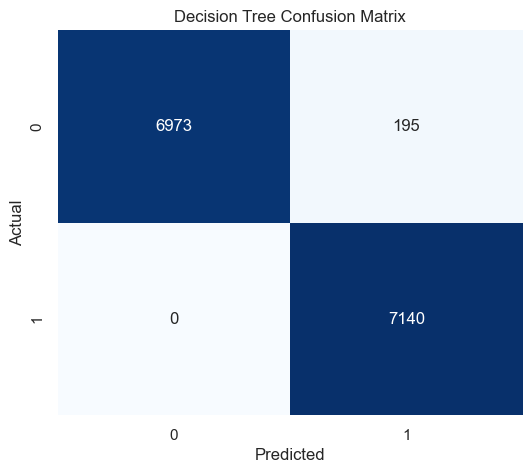


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      7168
           1       0.97      1.00      0.99      7140

    accuracy                           0.99     14308
   macro avg       0.99      0.99      0.99     14308
weighted avg       0.99      0.99      0.99     14308



In [65]:
# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

# Print metrics
print("Decision Tree Performance:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1:.4f}")

# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))


Hyper Parameter Tuning

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Cross-Validation Accuracy: 0.9851
Tuned Decision Tree Accuracy: 0.9897

Classification Report for Tuned Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7168
           1       0.98      1.00      0.99      7140

    accuracy                           0.99     14308
   macro avg       0.99      0.99      0.99     14308
weighted avg       0.99      0.99      0.99     14308



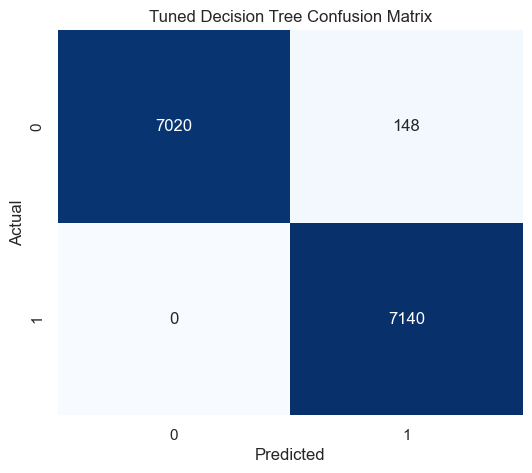

In [64]:
# Explain the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 30],   
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4],     
    'max_features': [None, 'sqrt', 'log2'],  
    'splitter': ['best', 'random'],   
}

# Start with Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Put up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Obtain the best hyperparameters and best score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Estimate using the best model
y_pred_dt_tuned = grid_search.best_estimator_.predict(X_test)

# Calculate metrics for the tuned Decision Tree model
dt_accuracy = accuracy_score(y_test, y_pred_dt_tuned)
print(f"Tuned Decision Tree Accuracy: {dt_accuracy:.4f}")

# Print the classification report
print("\nClassification Report for Tuned Decision Tree:")
print(classification_report(y_test, y_pred_dt_tuned))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt_tuned), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Tuned Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
